# Plotting PyPSA results (simplified version 4-nodes clustering and 1 year data - Bolivia)

In [64]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 0 folder(s) up.


In [65]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

# Load all networks

In [66]:
# add_electricity_network = os.getcwd() + '/networks/elec.nc'
# n_add_el = pypsa.Network(add_electricity_network)

# clustered_network = os.getcwd() + '/networks/elec_s_20.nc'
# n_cluster = pypsa.Network(clustered_network)



#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

solved_network = os.getcwd() + "/results/networks/elec_s_30_ec_lcopt_Co2L-1H.nc"

base_network= os.getcwd() +  "/networks/base.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_base= pypsa.Network(base_network)

n_solve = pypsa.Network(solved_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
INFO:pypsa.io:Imported network elec_s_30_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


# Base network

In [67]:
n_base

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 155
 - Line: 161
 - Transformer: 39
Snapshots: 8760

(<matplotlib.collections.PatchCollection at 0x2de8fe90e50>,
 <matplotlib.collections.LineCollection at 0x2de941265f0>)

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


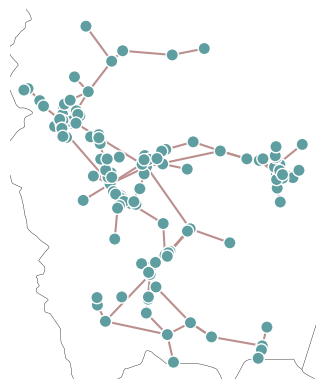

In [68]:
n_base.plot()

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


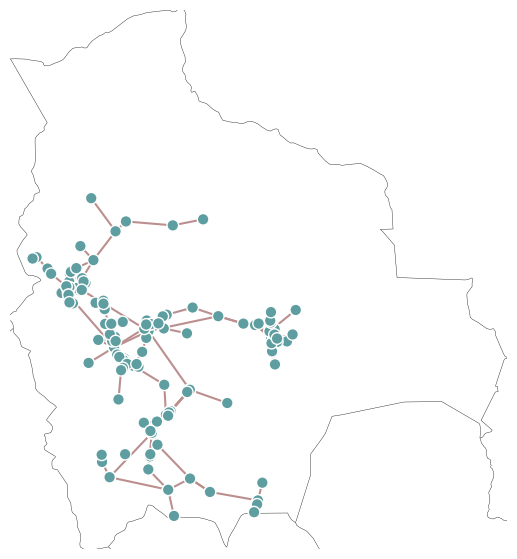

In [139]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#countries = ["Bolivia"]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_base.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


### Conections between buses 

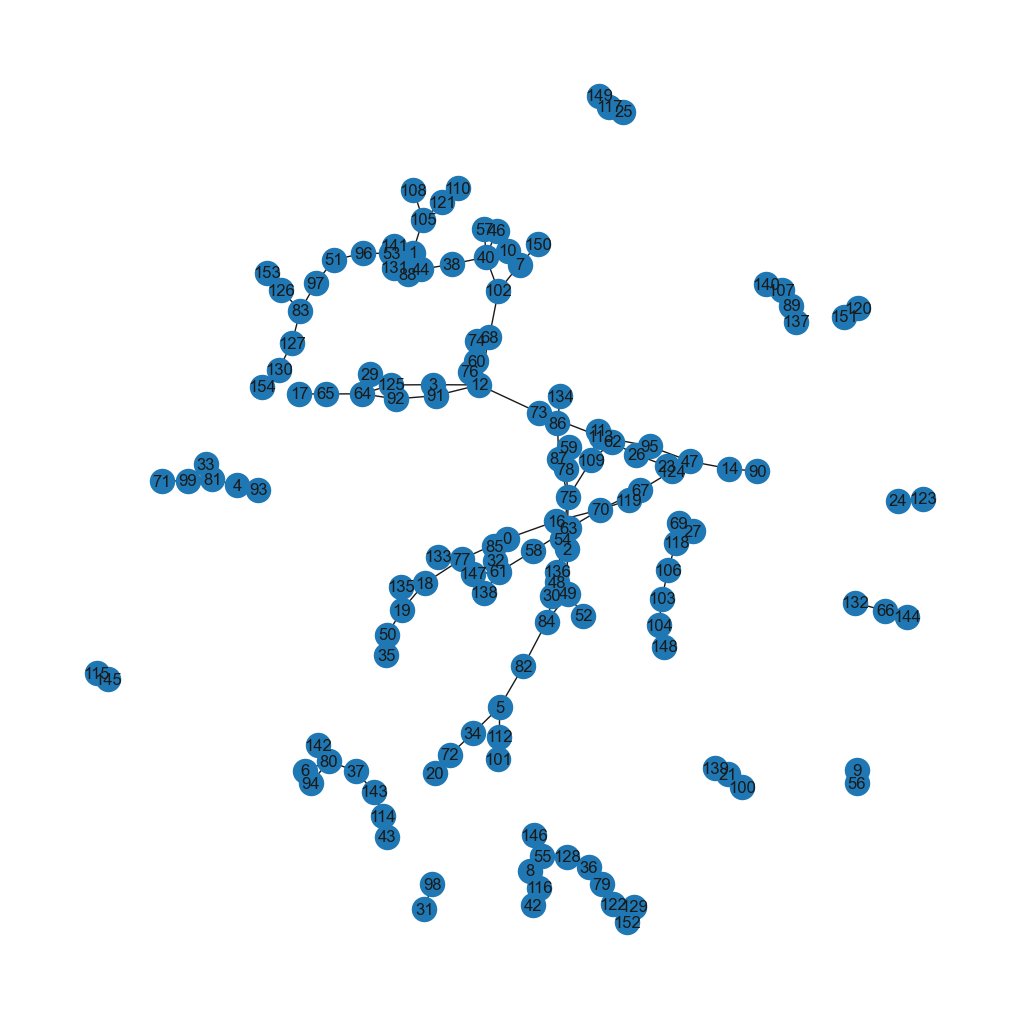

In [140]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 2,
    'width': 3,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    pos[i] = [df_buses.lon[i], df_buses.lat[i]]



pos = nx.shell_layout(G)

plt.figure(figsize=(10, 10))
fig1 = nx.draw(G, with_labels=True)

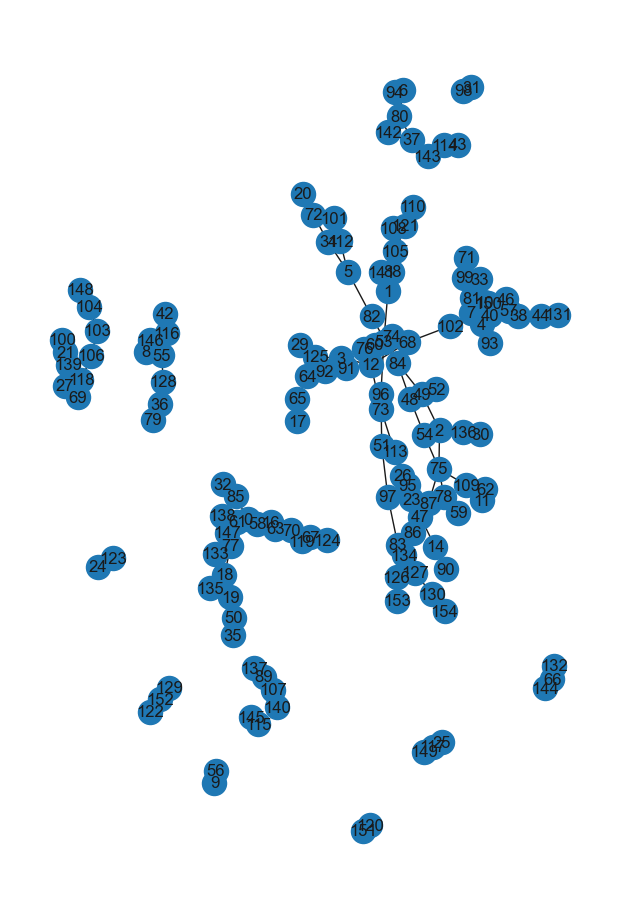

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 1,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    node_id = i
    latitude = df_buses.lat[i]
    longitude = df_buses.lon[i]
    pos[node_id] = [latitude, longitude]



pos = nx.shell_layout(G)

plt.figure(figsize=(6, 9))
fig1 = nx.draw(G, with_labels=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\239534189.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_buses = n.buses[~n.buses.index.str.contains(r" (H2|battery)$")]
c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


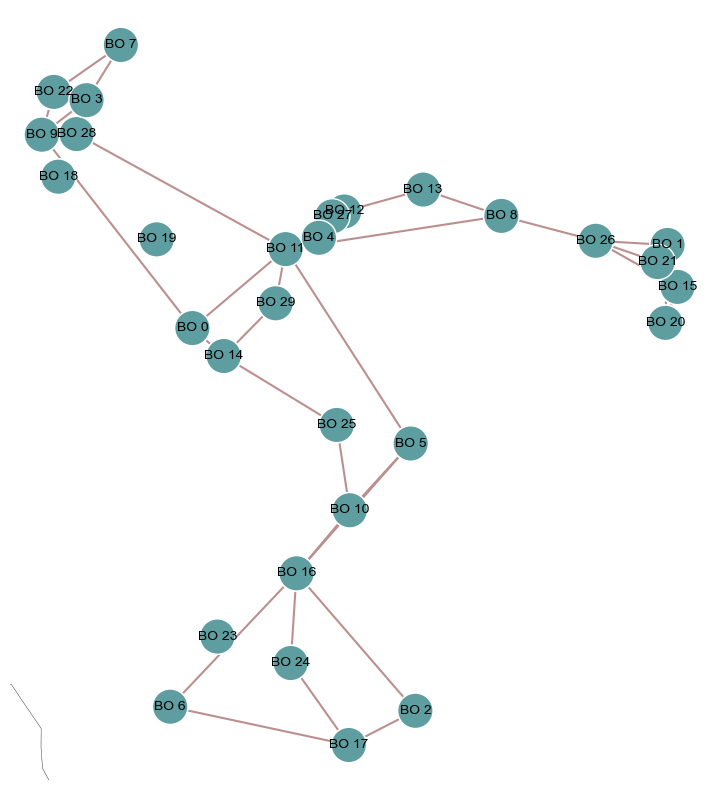

In [181]:
#load map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

#create subplot with cartopy projection
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw={'projection': ccrs.PlateCarree()})

#plot the shape of the map
n.plot(ax = ax)

# Convert "Bus" index column to string type
filtered_buses = n.buses
filtered_buses.index = filtered_buses.index.astype(str)
filtered_buses = n.buses[~n.buses.index.str.contains(r" (H2|battery)$")]

# Add bus names to the plot
for bus, (lon, lat) in filtered_buses[['x', 'y']].iterrows():
    ax.text(lon, lat, bus, fontsize=10, color='black', ha='center', va='center', transform=ccrs.PlateCarree(), zorder=10)

#add the margin of the country defined in shapes to the orverall plot
#ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

#show the plot
plt.show()



# Solved network

### General info

In [72]:
n = n_solve
n

PyPSA Network
Components:
 - Bus: 90
 - Carrier: 16
 - Generator: 109
 - GlobalConstraint: 1
 - Line: 40
 - Link: 120
 - Load: 30
 - StorageUnit: 8
 - Store: 60
Snapshots: 8760

In [73]:
# ".global_constraints" muestra las restricciones consideradas para el modelo (en el config.yaml solo se tomo en cuenta el limite de emisiones) tonCO2/year

n.global_constraints

,sense,constant,mu,type,investment_period,carrier_attribute
GlobalConstraint,,,,,,
CO2Limit,<=,77500000.0,0.000038,primary_energy,NaN,co2_emissions


In [74]:
# estimation of the total emissions from the system in MtonCO2:

emissions = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions) # t/h

#snapshot_weightings provides the number of agregation used for each time step considered (4 hours in this case) and @ ins a multiplier
n.snapshot_weightings.generators @ emissions.sum(axis=1).div(1e6) # Mt


1.7412396307052231

In [75]:
##### check why the value does not appear 
#   - It seems that while the model run before, due to restrictions on simulation, proper solving wasn't possible (by increasing tolerances of the solver the model gets actual results)
# Eur/Year

n.objective

640754664.2002933

In [76]:
# Calculo del precio promedio de energia promedio en la red (costo total de operacion)
# Costo promedio de energia = (costos acumulados durante el periodo de analisis) /  [(sumatoria de las cargas variables en el tiempo)*(horas consideradas en cada time frame)

print("Costo total " + str(n.objective))
print("demanda total " + str(n.loads_t.p.sum().sum()*1))

(n.objective)/(n.loads_t.p.sum().sum()*1)

Costo total 640754664.2002933
demanda total 20264584.409948695


31.619432762002322

In [77]:
#promedio del costo marginal en los buses y a lo largo del año

n.buses_t.marginal_price.mean(axis = 1).mean()   ####   .plot(kind = "area")

43.30709568778236

In [78]:
n.buses_t

{'v_mag_pu_set': Empty DataFrame
 Columns: []
 Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00, 2013-01-02 00:00:00, 2013-01-02 01:00:00, 2013-01-02 02:00:00, 2013-01-02 03:00:00, 2013-01-02 04:00:00, 2013-01-02 05:00:00, 2013-01-02 06:00:00, 2013-01-02 07:00:00, 2013-01-02 08:00:00, 2013-01-02 09:00:00, 2013-01-02 10:00:00, 2013-01-02 11:00:00, 2013-01-02 12:00:00, 2013-01-02 13:00:00, 2013-01-02 14:00:00, 2013-01-02 15:00:00, 2013-01-02 16:00:00, 2013-01-02 17:00:00, 2013-01-02 18:00:00, 2013-01-02 19:00:00, 2013-01-02 20:00:00, 

### Spatial temporal resolution

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


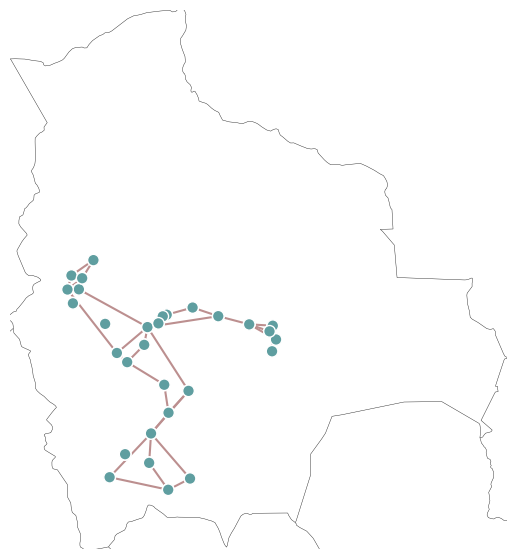

In [137]:
#Resultado grafico de la red electrica ideal (lineas verdes representan expansiones de la red)

#####beacuase all buses are not connected it might be that the problem is not fully solved 
# - Lines used in the model don't consider newer power lines (data bases were not apdated)
# - This is proved by comparing raw lines (all available lines in OSM) and clean lines (processed lines to be used in the model)
# - A linker is required to include new/additional data into the "all_clean_lines.geojson"

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [134]:
n.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-66.990567,-18.104733,Slack,BO 0 onwind,AC,,None,1.0,0.0,inf,
BO 1,220.0,BO,-63.198200,-17.441350,PQ,,AC,,None,1.0,0.0,inf,
BO 10,220.0,BO,-65.734400,-19.558733,PQ,,AC,,None,1.0,0.0,inf,
BO 11,220.0,BO,-66.246225,-17.474725,PQ,,AC,,None,1.0,0.0,inf,
BO 12,220.0,BO,-65.778500,-17.174400,PQ,,AC,,None,1.0,0.0,inf,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BO 5 battery,1.0,BO,-65.248150,-19.026100,Slack,,battery,,None,1.0,0.0,inf,
BO 6 battery,1.0,BO,-67.167400,-21.126700,Slack,,battery,,None,1.0,0.0,inf,
BO 7 battery,1.0,BO,-67.561200,-15.845800,Slack,,battery,,None,1.0,0.0,inf,


In [81]:
#Se muestra el tamaño de la resolucion temporal del modelo - timesteps 
# - Currently the system is working with a toy version of Bolivia to allow faster solving times (4h time aggregation and a little over 5 months acoording the rules in the config.yaml file) 
# - A more complete model should be run eventually with different conditions (higher time resolution) or methods like tsam (https://tsam.readthedocs.io/en/latest/mathematicalBackgroundDoc.html)
#  

len(n.snapshots)

8760

### Overview components

In [82]:
#Imprimir la lista de componentes considerados en el dataframe creado

for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 90 entries
Component 'Carrier' has 16 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 40 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 120 entries
Component 'Load' has 30 entries
Component 'Generator' has 109 entries
Component 'StorageUnit' has 8 entries
Component 'Store' has 60 entries


### Energy balance

In [83]:
# ".stores_t" hace referencia a la energia que se puede almacenar en un bus (se usa para definir otras tecnologias como storage)
# - https://pypsa.readthedocs.io/en/latest/components.html#store

n.stores_t.p.sum()

Store
BO 0 H2          1.776357e-15
BO 1 H2         -3.552714e-15
BO 10 H2         1.065814e-14
BO 11 H2        -2.309264e-14
BO 12 H2         1.421085e-14
BO 13 H2        -2.131628e-14
BO 14 H2         5.329071e-15
BO 15 H2         8.881784e-15
BO 16 H2         1.101341e-13
BO 17 H2        -3.552714e-14
BO 18 H2        -3.410605e-13
BO 19 H2         0.000000e+00
BO 2 H2          1.705303e-13
BO 20 H2        -1.953993e-14
BO 21 H2         1.421085e-14
BO 22 H2        -7.105427e-14
BO 23 H2         0.000000e+00
BO 24 H2         1.421085e-14
BO 25 H2         2.486900e-14
BO 26 H2        -7.105427e-15
BO 27 H2        -5.329071e-15
BO 28 H2         8.526513e-14
BO 29 H2        -7.105427e-15
BO 3 H2          1.953993e-14
BO 4 H2         -7.105427e-15
BO 5 H2          4.618528e-14
BO 6 H2          2.842171e-14
BO 7 H2          3.694822e-13
BO 8 H2         -3.552714e-15
BO 9 H2         -2.131628e-14
BO 0 battery     1.509903e-14
BO 1 battery    -1.465494e-14
BO 10 battery   -3.197442e-14
BO 1

In [84]:
n.stores_t.p.sum().sum()

-6.441513988875158e-13

In [85]:
# se imprimen todos los generadores considerados en el modelo

##### check if loadshedding is being used in the config.yaml file, at the solving section 
# - load shedding is represented in the model by the inclution on additional "load" generation/generators 

print(type(n.generators))
print(n.generators.columns)
n.generators

<class 'pandas.core.frame.DataFrame'>
Index(['p_nom_max', 'weight', 'p_nom', 'capital_cost', 'efficiency',
       'p_nom_min', 'marginal_cost', 'bus', 'p_nom_extendable', 'carrier',
       'control', 'p_nom_opt', 'sign', 'build_year', 'min_up_time',
       'min_down_time', 'up_time_before', 'down_time_before', 'type',
       'p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'lifetime', 'committable',
       'start_up_cost', 'shut_down_cost', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down'],
      dtype='object')


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,p_nom_extendable,carrier,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 onwind,1.281121e+05,6602.480141,0.000000e+00,109295.569252,1.000,0.0,0.025546,BO 0,True,onwind,Slack,2.893286e-02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 ror,inf,202.670000,2.026700e+02,270940.715283,0.900,0.0,0.009725,BO 0,False,ror,,2.026700e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,1.805643e+05,37144.998852,1.004000e+02,50855.958267,1.000,100.4,0.020260,BO 0,True,solar,,2.751908e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,1.236000e+02,84469.122809,0.500,123.6,12.890038,BO 1,False,CCGT,,1.236000e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 biomass,inf,0.000000,9.900000e+01,278015.359506,0.468,99.0,14.967907,BO 1,True,biomass,,9.900001e+01,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BO 5 load,inf,NaN,1.000000e+09,0.000000,1.000,0.0,1.010476,BO 5,False,load,PQ,1.000000e+09,0.001,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 6 load,inf,NaN,1.000000e+09,0.000000,1.000,0.0,1.010203,BO 6,False,load,PQ,1.000000e+09,0.001,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 7 load,inf,NaN,1.000000e+09,0.000000,1.000,0.0,1.010071,BO 7,False,load,PQ,1.000000e+09,0.001,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [86]:
#Imprimir solo los generadores de Bolivia

########this is only necessary if several countries are studied at the same time

idx = ['BO' in x for x in n.generators.index]
n.generators.loc[idx,:].head()

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,p_nom_extendable,carrier,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 onwind,1.281121e+05,6602.480141,0.00,109295.569252,1.000,0.0,0.025546,BO 0,True,onwind,Slack,0.028933,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 ror,inf,202.670000,202.67,270940.715283,0.900,0.0,0.009725,BO 0,False,ror,,202.670000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,1.805643e+05,37144.998852,100.40,50855.958267,1.000,100.4,0.020260,BO 0,True,solar,,275.190791,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,123.60,84469.122809,0.500,123.6,12.890038,BO 1,False,CCGT,,123.600000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 biomass,inf,0.000000,99.00,278015.359506,0.468,99.0,14.967907,BO 1,True,biomass,,99.000014,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [87]:
#Imprimir la suma de potencias nominales de los generadores de Bolivia

idx = ['BO' in x for x in n.generators.index]

print(n.generators.loc[idx,:].p_nom.sum())
print(n.generators.loc[idx,:].p_nom_opt.sum())

30000001034.77
30000003944.275223


In [88]:
# Difference between total load and generation
# losses = n.stores_t

n.generators_t.p.sum().sum() - n.loads_t.p.sum().sum()  # - substract storage losses


2349142.7316398136

### Generator capacity

In [89]:
gen_cap = n.generators.groupby(["carrier"]).sum()
# gen_cap.to_csv('capacities_by_carrier.csv',index=False)
gen_cap


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\278006981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_cap = n.generators.groupby(["carrier"]).sum()


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,NaN,0.000000,1.236000e+02,2.534074e+05,1.500,123.6,38.669974,0,1.236000e+02,3.00,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
OCGT,NaN,0.000000,0.000000e+00,2.361728e+05,1.950,0.0,71.971403,0,0.000000e+00,5.00,0,0,0,5,0,0.0,5.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,5.0,5.0
biomass,NaN,0.000000,9.900000e+01,5.560307e+05,0.936,99.0,29.934711,2,1.619008e+02,2.00,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
geothermal,inf,0.000000,5.500000e+01,3.344310e+05,0.239,55.0,0.010662,1,1.460163e+03,1.00,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
load,NaN,0.000000,3.000000e+10,0.000000e+00,30.000,0.0,30.303994,0,3.000000e+10,0.03,0,0,0,30,0,0.0,30.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,30.0,30.0
oil,inf,0.000000,0.000000e+00,3.823456e+04,0.393,0.0,130.236342,0,0.000000e+00,1.00,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,2.375876e+06,160337.867797,4.500000e+01,3.278867e+06,30.000,45.0,0.750726,30,4.602320e+01,30.00,0,0,0,30,0,0.0,30.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,30.0,30.0
ror,NaN,611.770000,6.117700e+02,1.896585e+06,6.300,0.0,0.072412,0,6.117700e+02,7.00,0,0,0,7,0,0.0,7.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,7.0,7.0
solar,1.869809e+06,330825.566632,1.004000e+02,1.525679e+06,30.000,100.4,0.598382,30,1.540818e+03,30.00,0,0,0,30,0,0.0,30.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,30.0,30.0


In [90]:
n.stores_t.p.head()

Store,BO 0 H2,BO 1 H2,BO 10 H2,BO 11 H2,BO 12 H2,BO 13 H2,BO 14 H2,BO 15 H2,BO 16 H2,BO 17 H2,BO 18 H2,BO 19 H2,BO 2 H2,BO 20 H2,BO 21 H2,BO 22 H2,BO 23 H2,BO 24 H2,BO 25 H2,BO 26 H2,BO 27 H2,BO 28 H2,BO 29 H2,BO 3 H2,BO 4 H2,BO 5 H2,BO 6 H2,BO 7 H2,BO 8 H2,BO 9 H2,BO 0 battery,BO 1 battery,BO 10 battery,BO 11 battery,BO 12 battery,BO 13 battery,BO 14 battery,BO 15 battery,BO 16 battery,BO 17 battery,BO 18 battery,BO 19 battery,BO 2 battery,BO 20 battery,BO 21 battery,BO 22 battery,BO 23 battery,BO 24 battery,BO 25 battery,BO 26 battery,BO 27 battery,BO 28 battery,BO 29 battery,BO 3 battery,BO 4 battery,BO 5 battery,BO 6 battery,BO 7 battery,BO 8 battery,BO 9 battery
snapshot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.171451,-0.001602,2.738563,0.069848,0.051218,0.044777,0.194826,-0.001957,4.656934,9.564895,7.695858,11.195343,10.798024,-0.002217,-0.001570,0.165885,3.410659,2.083962,1.325992,-0.002462,0.053625,0.204350,0.086975,0.029211,0.058963,5.035689,12.216266,0.025239,0.010455,0.150152,0.992608,0.830544,2.010901,0.829251,0.640409,1.051275,1.345315,0.830532,3.168405,2.859508,66.682340,43.715292,6.495718,0.826129,0.838008,6.827705,10.137502,0.776383,0.909774,0.834597,0.671767,12.127128,0.906336,1.049173,0.727043,3.158738,3.461898,5.176148,1.000139,5.217719
2013-01-01 01:00:00,0.214538,0.002950,2.857223,0.085939,0.064047,0.054879,0.245695,0.002591,3.856377,4.870646,8.325841,11.352538,4.348267,0.002378,0.002931,0.254817,3.401698,2.370600,1.711075,0.002041,0.066692,0.361366,0.106263,0.040404,0.072583,3.949388,6.246388,0.036722,0.015702,0.225539,1.328126,1.233213,2.203199,1.126120,0.931205,1.518362,1.640425,1.235016,3.004885,2.812357,63.140906,41.356492,4.009716,1.233399,1.237967,4.586539,9.601580,1.010434,1.235508,1.233486,0.962758,5.842954,1.208235,1.388859,1.017962,2.997754,3.428289,3.833154,1.411200,4.066897
2013-01-01 02:00:00,0.006084,-0.008251,0.020381,-0.000558,-0.007239,-0.042166,0.006512,-0.008704,0.020958,0.021776,7.975387,11.588703,0.021417,-0.009049,-0.008209,0.007279,3.379222,0.017687,0.014257,-0.009259,-0.005800,0.007836,0.001398,-0.011873,-0.003664,0.022826,0.020178,-0.017320,0.004906,0.006018,-0.034212,-0.009250,-0.001053,-0.042744,-0.044133,-0.046144,-0.030288,-0.009362,-0.000951,-0.001067,56.597282,36.431540,-0.001482,-0.009795,-0.009030,-0.040062,8.477500,-0.000512,-0.008917,-0.009808,-0.043960,-0.040029,-0.036867,-0.040601,-0.043507,0.001681,-0.002266,-0.040958,0.026833,-0.039793
2013-01-01 03:00:00,-0.037343,0.001187,-0.656841,-0.042979,-0.097681,-1.855509,-0.041979,0.000763,-1.295202,-2.941341,8.251451,11.531226,-5.454960,0.000462,0.001200,-0.026069,3.354846,-0.868154,-0.176651,0.000277,-0.084387,-0.021924,-0.046800,-0.283304,-0.063691,-2.027817,-4.089374,-5.136216,0.005254,-0.029152,-0.119961,0.086090,-0.190641,-0.107179,-0.148125,-1.715402,-0.125145,0.086101,-0.205589,-0.229726,49.469346,31.538563,-0.222386,0.086167,0.086092,-0.110814,7.313320,-0.196131,-0.158462,0.085683,-0.140172,-0.112716,-0.114372,-0.122168,-0.125067,-0.201637,-0.241214,-0.119144,0.093247,-0.111291
2013-01-01 04:00:00,-0.039222,0.002965,-1.306685,-0.044465,-0.069596,-1.360809,-0.045115,0.002530,-2.511600,-5.490241,8.242298,11.523919,-10.931794,0.002202,0.002982,-0.024629,3.338875,-0.945800,-0.289354,0.002120,-0.064750,-0.017469,-0.050366,-0.537381,-0.056380,-2.865955,-7.862839,-8.721273,-0.358830,-0.027817,0.027228,0.209212,-0.012557,0.028539,0.039523,0.148552,0.027514,0.209610,-0.010430,-0.009872,47.806360,30.360518,0.001485,0.208937,0.209851,0.027015,7.041284,-0.024192,0.006116,0.210748,0.037442,0.031807,0.027118,-0.012932,0.033197,-0.023188,0.011023,0.006849,-0.007669,0.028007


<AxesSubplot:xlabel='snapshot'>

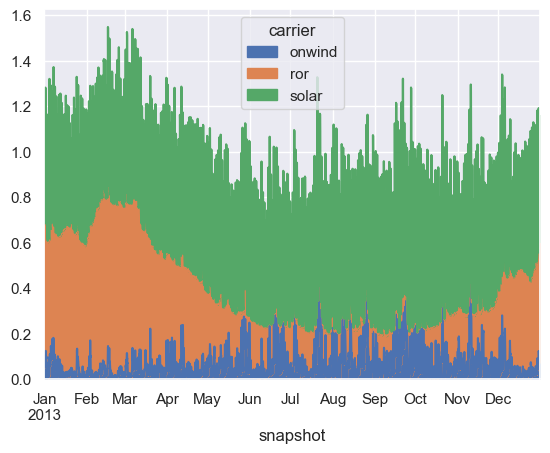

In [91]:
n.generators_t.p_max_pu.groupby(n.generators.carrier, axis=1).mean().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

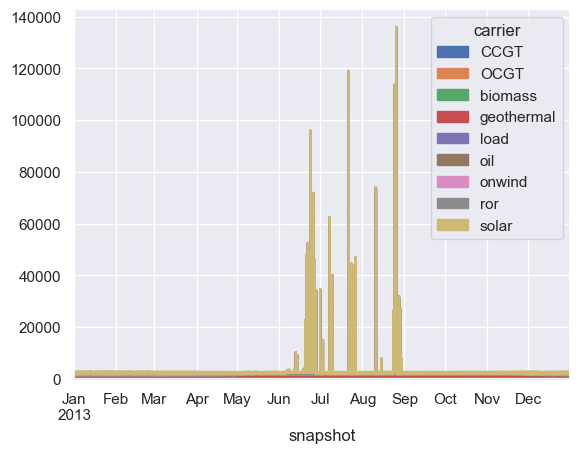

In [92]:
#excluded_carrier = 'load'
#grouped_mean = n.generators_t.p.groupby(n.generators.carrier, axis=1).mean().drop(columns=excluded_carrier)
#grouped_mean.plot(kind='line')

n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

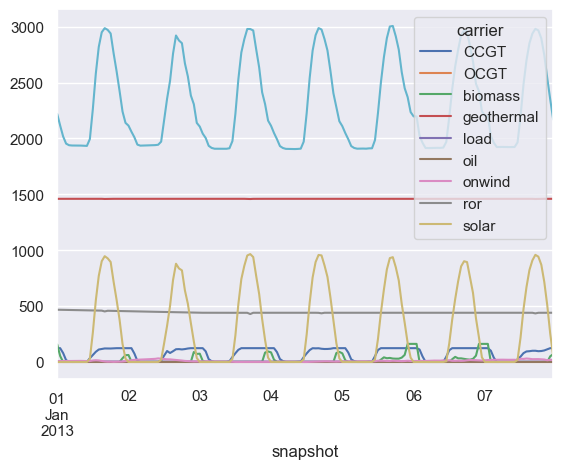

In [93]:
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].plot()
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).mean().plot()

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().plot(kind = "line")

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().sum(axis=1).plot(kind = "line")



In [94]:
# If 0, all renewable capacity potential is used
n.generators.p_nom_max.sum() - n.generators.p_nom_opt.sum()

inf

In [95]:
n.loads_t.p.sum().sum()

20264584.409948695

In [96]:
n.generators_t.p.sum().sum()

22613727.14158851

In [97]:
#### pq la multiplicacion?

n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom.sum()

bus   carrier
BO 0  load       1.000000e+09
      onwind     0.000000e+00
      ror        2.026700e+02
      solar      1.004000e+02
BO 1  CCGT       1.236000e+02
                     ...     
BO 8  solar      0.000000e+00
BO 9  OCGT       0.000000e+00
      load       1.000000e+09
      onwind     0.000000e+00
      solar      0.000000e+00
Name: p_nom, Length: 109, dtype: float64

### Lines

In [98]:
n.lines

,bus0,bus1,length,type,s_max_pu,s_nom,capital_cost,num_parallel,s_nom_extendable,s_nom_min,x,r,b,build_year,carrier,x_pu_eff,r_pu_eff,s_nom_opt,v_nom,g,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,BO 0,BO 11,131.804564,Al/St 240/40 4-bundle 380.0,0.7,983.112038,5022.165914,0.578947,True,569.170127,56.004957,6.829873,0.000331,0,AC,0.001157,0.000141,569.182264,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,BO 0,BO 14,45.330211,Al/St 240/40 4-bundle 380.0,0.7,983.112038,1727.083063,0.578947,True,569.170127,19.261219,2.348929,0.000114,0,AC,0.000398,0.000049,569.209820,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,BO 0,BO 9,267.248292,Al/St 240/40 4-bundle 380.0,0.7,491.556019,10181.396647,0.289474,True,284.585064,227.112458,27.696641,0.000335,0,AC,0.004692,0.000572,387.880390,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,BO 1,BO 15,47.708173,Al/St 240/40 4-bundle 380.0,0.7,983.112038,1818.287218,0.578947,True,569.170127,20.271637,2.472151,0.000120,0,AC,0.000419,0.000051,569.241822,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,BO 1,BO 20,86.464245,Al/St 240/40 4-bundle 380.0,0.7,491.556019,3294.860633,0.289474,True,284.585064,73.478887,8.960840,0.000109,0,AC,0.001518,0.000185,284.673842,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
6,BO 1,BO 21,21.726732,Al/St 240/40 4-bundle 380.0,0.7,1474.668058,827.945003,0.868421,True,853.755191,6.154591,0.750560,0.000082,0,AC,0.000127,0.000016,854.359423,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
7,BO 1,BO 26,76.194329,Al/St 240/40 4-bundle 380.0,0.7,491.556019,2903.463186,0.289474,True,284.585064,64.751326,7.896503,0.000096,0,AC,0.001338,0.000163,284.598519,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
8,BO 10,BO 16,89.326613,Al/St 240/40 4-bundle 380.0,0.7,491.556019,3402.943235,0.289474,True,284.585064,75.911380,9.257485,0.000112,0,AC,0.001568,0.000191,1001.825136,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
9,BO 10,BO 25,95.595230,Al/St 240/40 4-bundle 380.0,0.7,491.556019,3642.022594,0.289474,True,284.585064,81.238565,9.907142,0.000120,0,AC,0.001678,0.000205,718.652086,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [99]:
print(type(n.lines_t))
print(n.lines_t)

<class 'pypsa.descriptors.Dict'>
{'s_max_pu': Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00, 2013-01-02 00:00:00, 2013-01-02 01:00:00, 2013-01-02 02:00:00, 2013-01-02 03:00:00, 2013-01-02 04:00:00, 2013-01-02 05:00:00, 2013-01-02 06:00:00, 2013-01-02 07:00:00, 2013-01-02 08:00:00, 2013-01-02 09:00:00, 2013-01-02 10:00:00, 2013-01-02 11:00:00, 2013-01-02 12:00:00, 2013-01-02 13:00:00, 2013-01-02 14:00:00, 2013-01-02 15:00:00, 2013-01-02 16:00:00, 2013-01-02 17:00:00, 2013-01-02 18:00:00, 2013-01-02 19:0

In [100]:
n.lines_t.p0.max()
n.lines_t.p0.min()

Line
1     -51.171869
2    -398.443983
3     204.209837
4      30.957911
5      14.557820
6      54.502308
7    -130.699885
8    -701.275485
9     380.516542
10    168.587779
11     19.040250
12      0.256973
13    175.927823
14   -157.547905
15    -55.088126
16   -474.240038
17     90.404288
18    133.204066
19   -180.099184
20     70.080026
21   -490.938182
22     40.336353
23     27.570992
24    -42.600371
25   -109.554030
26   -103.024760
27   -212.428464
28    334.239611
29   -793.011746
30    308.316475
31    182.052755
32   -592.663068
33   -149.795216
34    179.595704
35   -268.053924
36   -402.681971
37   -123.550673
38    161.769596
39    138.461773
40   -215.201999
dtype: float64

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='snapshot'>

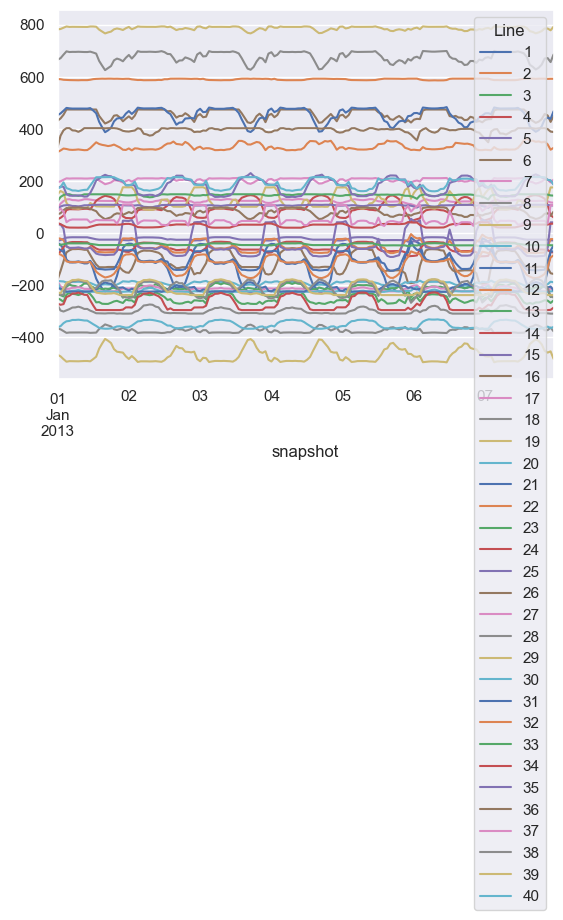

In [101]:
print(type(n.lines_t.p0) and type(n.lines_t.p1))

n.lines_t.p1.loc["2013-01-01":"2013-01-07",:].plot(kind = "line")

### Demand

In [102]:
print(type(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()))

print(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum())

<class 'pandas.core.series.Series'>
bus
BO 0     1.000000e+09
BO 1     1.000000e+09
BO 10    1.000000e+09
BO 11    1.000000e+09
BO 12    1.000000e+09
BO 13    1.000000e+09
BO 14    1.000000e+09
BO 15    1.000000e+09
BO 16    1.000000e+09
BO 17    1.000000e+09
BO 18    1.000000e+09
BO 19    1.000000e+09
BO 2     1.000000e+09
BO 20    1.000000e+09
BO 21    1.000000e+09
BO 22    1.000000e+09
BO 23    1.000000e+09
BO 24    1.000000e+09
BO 25    1.000000e+09
BO 26    1.000000e+09
BO 27    1.000000e+09
BO 28    1.000000e+09
BO 29    1.000000e+09
BO 3     1.000000e+09
BO 4     1.000000e+09
BO 5     1.000000e+09
BO 6     1.000001e+09
BO 7     1.000000e+09
BO 8     1.000000e+09
BO 9     1.000000e+09
Name: p_nom_opt, dtype: float64


<AxesSubplot:xlabel='snapshot'>

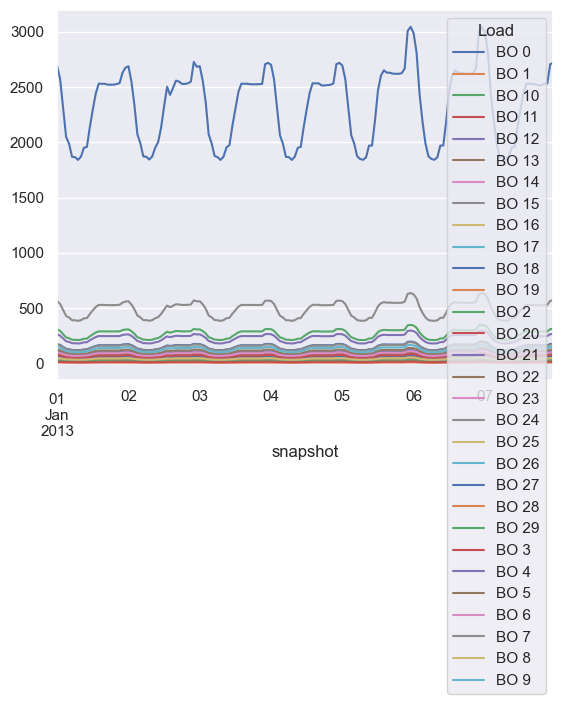

In [103]:
#n.loads_t.p_set.loc["2013-01-01":"2013-12-30","BO0 0"].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()


Load
BO 0     1.312744e+06
BO 1     2.387191e+05
BO 10    1.397128e+05
BO 11    4.203049e+05
BO 12    2.884393e+05
BO 13    6.603100e+05
BO 14    4.860608e+05
BO 15    1.275946e+06
BO 16    2.064745e+05
BO 17    2.052565e+05
BO 18    4.810429e+05
BO 19    3.413814e+05
BO 2     2.317397e+06
BO 20    5.658955e+05
BO 21    1.976921e+06
BO 22    1.479935e+05
BO 23    8.177635e+04
BO 24    1.300469e+05
BO 25    1.206557e+05
BO 26    1.667632e+05
BO 27    1.544381e+05
BO 28    5.834112e+04
BO 29    1.917481e+05
BO 3     1.125094e+05
BO 4     8.138662e+05
BO 5     9.328556e+05
BO 6     7.367913e+05
BO 7     4.234763e+06
BO 8     3.582008e+05
BO 9     1.107229e+06
dtype: float64
20264584.409948695


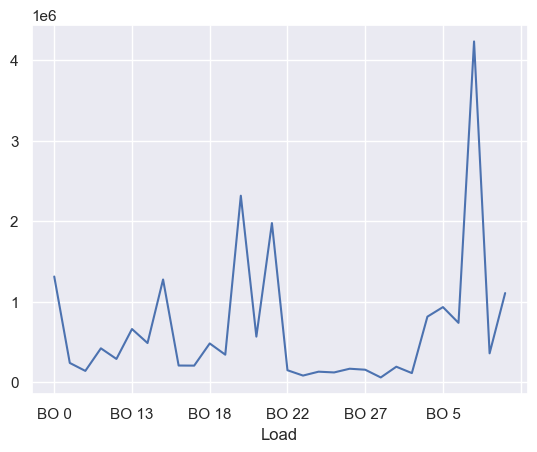

In [104]:
print(n.loads_t.p_set.sum())

n.loads_t.p_set.sum().plot()

print(n.loads_t.p_set.sum().sum())

In [105]:
a = n.loads_t.p_set.sum().rename("load").rename_axis("bus")
a.rename("load", inplace=True)
a.rename_axis("bus", inplace=True)
a

bus
BO 0     1.312744e+06
BO 1     2.387191e+05
BO 10    1.397128e+05
BO 11    4.203049e+05
BO 12    2.884393e+05
BO 13    6.603100e+05
BO 14    4.860608e+05
BO 15    1.275946e+06
BO 16    2.064745e+05
BO 17    2.052565e+05
BO 18    4.810429e+05
BO 19    3.413814e+05
BO 2     2.317397e+06
BO 20    5.658955e+05
BO 21    1.976921e+06
BO 22    1.479935e+05
BO 23    8.177635e+04
BO 24    1.300469e+05
BO 25    1.206557e+05
BO 26    1.667632e+05
BO 27    1.544381e+05
BO 28    5.834112e+04
BO 29    1.917481e+05
BO 3     1.125094e+05
BO 4     8.138662e+05
BO 5     9.328556e+05
BO 6     7.367913e+05
BO 7     4.234763e+06
BO 8     3.582008e+05
BO 9     1.107229e+06
Name: load, dtype: float64

In [106]:
n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()

###### potencia maxima?
#n.generators.iloc[:, :].groupby(["bus"]).p_max_pu.sum()

bus
BO 0     1.000000e+09
BO 1     1.000000e+09
BO 10    1.000000e+09
BO 11    1.000000e+09
BO 12    1.000000e+09
BO 13    1.000000e+09
BO 14    1.000000e+09
BO 15    1.000000e+09
BO 16    1.000000e+09
BO 17    1.000000e+09
BO 18    1.000000e+09
BO 19    1.000000e+09
BO 2     1.000000e+09
BO 20    1.000000e+09
BO 21    1.000000e+09
BO 22    1.000000e+09
BO 23    1.000000e+09
BO 24    1.000000e+09
BO 25    1.000000e+09
BO 26    1.000000e+09
BO 27    1.000000e+09
BO 28    1.000000e+09
BO 29    1.000000e+09
BO 3     1.000000e+09
BO 4     1.000000e+09
BO 5     1.000000e+09
BO 6     1.000001e+09
BO 7     1.000000e+09
BO 8     1.000000e+09
BO 9     1.000000e+09
Name: p_nom_opt, dtype: float64

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


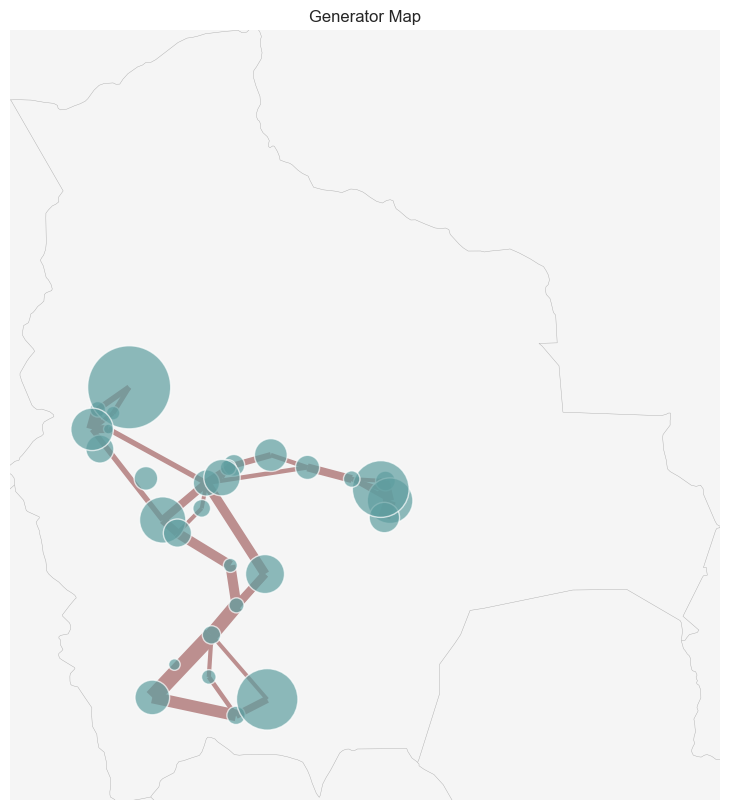

In [107]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={
        "projection": ccrs.PlateCarree()
    },  # PlateCarree(default), Mercator, Orthographic
)

# loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(
    margin=0.1,
    ax=ax,
    geomap=True,  #'10m' leads to a beautiful high resolution map
    projection=None,
    bus_colors="cadetblue",
    bus_alpha=0.7,
    bus_sizes=normalize_node_size(
        n.loads_t.p_set.sum().rename("load").rename_axis("bus")
    )*0.5,  # n.loads_t.p_set.sum().rename("load").rename_axis("bus")*.0000003,
    bus_cmap=None,
    line_colors="rosybrown",
    link_colors="darkseagreen",  # loading
    transformer_colors="orange",
    line_widths=n.lines.s_nom_opt / 1e2,
    link_widths=1.5,
    transformer_widths=1.5,
    line_cmap=None,
    link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
    transformer_cmap=None,
    flow=None,
    branch_components=None,
    layouter=None,
    title="Generator Map",
    boundaries=None,
    geometry=False,
    jitter=None,
    color_geomap=True,
)  # None or True

ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [108]:
# backup
gen_serie = n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
load_serie = n.loads_t.p_set.sum().rename("load").rename_axis("bus")

load_serie = pd.Series(
    load_serie.values,
    index=pd.MultiIndex.from_tuples([(id, "AC load") for id in load_serie.index]),
)

tot_serie = pd.concat([gen_serie, load_serie])  # .groupby(['bus', 'carrier']).sum()

pd.concat([gen_serie, load_serie])

bus   carrier
BO 0  load       1.000000e+09
      onwind     2.893286e-02
      ror        2.026700e+02
      solar      2.751908e+02
BO 1  CCGT       1.236000e+02
                     ...     
BO 5  AC load    9.328556e+05
BO 6  AC load    7.367913e+05
BO 7  AC load    4.234763e+06
BO 8  AC load    3.582008e+05
BO 9  AC load    1.107229e+06
Length: 139, dtype: float64

### Plot of Average Marginal Price

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


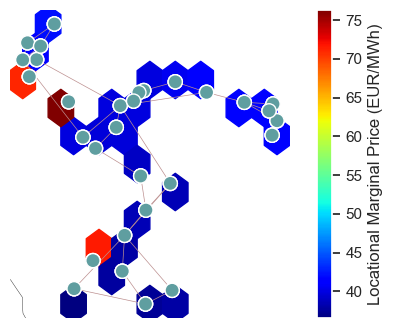

In [109]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

n = n_solve

now = n.snapshots[1800]  ##one specific time

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(7, 4)

n.plot(ax=ax, line_widths=pd.Series(0.5, n.lines.index))
plt.hexbin(
    n.buses.x,
    n.buses.y,
    gridsize=10,
    # C=n.buses_t.marginal_price.loc[now], #at one time (previous set up by scigrid)
    C=n.buses_t.marginal_price.sum()
    / len(n.snapshots[:]),  # Marginal price averaged over the whole year (My version)
    # - shows in which regions electricity will be cheap and where el. intensive companies should be placed.
    cmap=plt.cm.jet,
)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label("Locational Marginal Price (EUR/MWh)")

### Storage

In [110]:
n.stores

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,marginal_cost,build_year,e_nom_opt,type,e_nom,e_nom_min,e_nom_max,e_min_pu,e_max_pu,e_initial,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,standing_loss,lifetime
Store,,,,,,,,,,,,,,,,,,,,,,
BO 0 H2,BO 0 H2,H2,True,True,796.283619,0.009192,0,31.046036,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 1 H2,BO 1 H2,H2,True,True,796.283619,0.010494,0,35.533014,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 10 H2,BO 10 H2,H2,True,True,796.283619,0.010537,0,50.627581,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 11 H2,BO 11 H2,H2,True,True,796.283619,0.009121,0,26.432298,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 12 H2,BO 12 H2,H2,True,True,796.283619,0.009820,0,24.100169,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 13 H2,BO 13 H2,H2,True,True,796.283619,0.010306,0,94.421745,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 14 H2,BO 14 H2,H2,True,True,796.283619,0.009706,0,32.441316,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 15 H2,BO 15 H2,H2,True,True,796.283619,0.010593,0,35.507338,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 16 H2,BO 16 H2,H2,True,True,796.283619,0.009371,0,78.815220,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf


<AxesSubplot:xlabel='snapshot'>

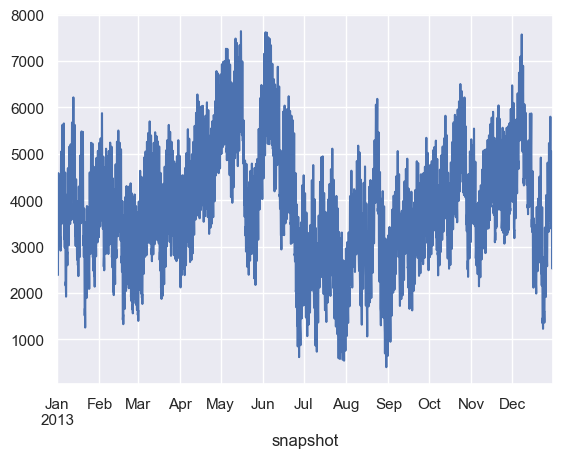

In [111]:
n.stores_t.e.loc["2013-01-01":"2013-12-30"].sum(axis=1).plot()

In [112]:
n.links.iloc[:].groupby(["carrier"]).p_nom_opt.sum()

carrier
H2 electrolysis       180.846804
H2 fuel cell          406.727574
battery charger       332.444830
battery discharger    369.383144
Name: p_nom_opt, dtype: float64

In [113]:
n.stores_t.e.sum()

Store
BO 0 H2          1.349018e+05
BO 1 H2          1.526921e+05
BO 10 H2         2.214157e+05
BO 11 H2         1.144157e+05
BO 12 H2         1.040140e+05
BO 13 H2         4.217507e+05
BO 14 H2         1.417567e+05
BO 15 H2         1.525564e+05
BO 16 H2         3.450486e+05
BO 17 H2         5.273650e+05
BO 18 H2         5.785710e+06
BO 19 H2         7.618933e+06
BO 2 H2          1.417398e+06
BO 20 H2         1.525147e+05
BO 21 H2         1.526938e+05
BO 22 H2         5.371269e+05
BO 23 H2         2.069786e+06
BO 24 H2         1.804003e+05
BO 25 H2         1.550415e+05
BO 26 H2         1.526813e+05
BO 27 H2         1.057199e+05
BO 28 H2         6.401357e+05
BO 29 H2         1.229032e+05
BO 3 H2          2.095788e+05
BO 4 H2          1.093988e+05
BO 5 H2          3.177236e+05
BO 6 H2          8.833649e+05
BO 7 H2          1.806176e+06
BO 8 H2          1.855464e+05
BO 9 H2          4.430421e+05
BO 0 battery     2.754937e+04
BO 1 battery     3.163992e+04
BO 10 battery    5.516695e+04
BO 1

### Storage_units (hydro reservoir)

In [114]:
n.storage_units

,p_min_pu,efficiency_dispatch,carrier,cyclic_state_of_charge,efficiency_store,bus,max_hours,capital_cost,p_nom,marginal_cost,build_year,p_nom_opt,control,type,p_nom_extendable,p_nom_min,p_nom_max,p_max_pu,p_set,q_set,sign,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 hydro,0.0,0.9,hydro,True,0.0,BO 0,1300.0,160627.143522,6.13,0.010747,0,6.13,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 11 hydro,0.0,0.9,hydro,True,0.0,BO 11,1300.0,160627.143522,118.68,0.010454,0,118.68,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 12 hydro,0.0,0.9,hydro,True,0.0,BO 12,1300.0,160627.143522,91.11,0.010762,0,91.11,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 2 hydro,0.0,0.9,hydro,True,0.0,BO 2,1300.0,160627.143522,7.46,0.010153,0,7.46,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 22 hydro,0.0,0.9,hydro,True,0.0,BO 22,1300.0,160627.143522,27.66,0.010652,0,27.66,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 27 hydro,0.0,0.9,hydro,True,0.0,BO 27,1300.0,160627.143522,65.25,0.009719,0,65.25,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 3 hydro,0.0,0.9,hydro,True,0.0,BO 3,1300.0,160627.143522,38.40,0.009762,0,38.40,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 4 hydro,0.0,0.9,hydro,True,0.0,BO 4,1300.0,160627.143522,194.63,0.009652,0,194.63,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0


<AxesSubplot:xlabel='snapshot'>

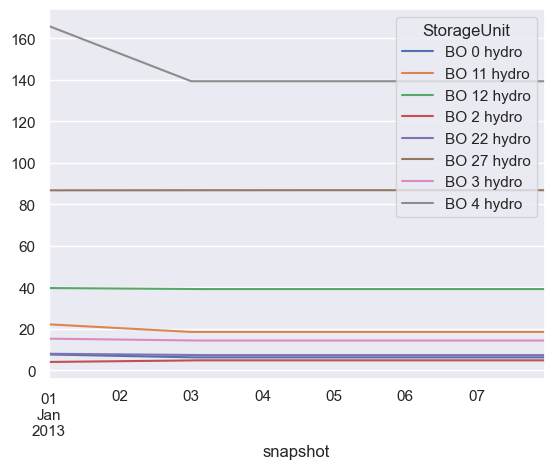

In [115]:

n.storage_units_t.inflow.loc["2013-01-01":"2013-01-07"].plot()

In [53]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-01"].sum(axis=0)

StorageUnit
BO 0 hydro    828.822552
BO 2 hydro     53.868765
BO 3 hydro     49.995558
dtype: float64

<AxesSubplot:xlabel='snapshot'>

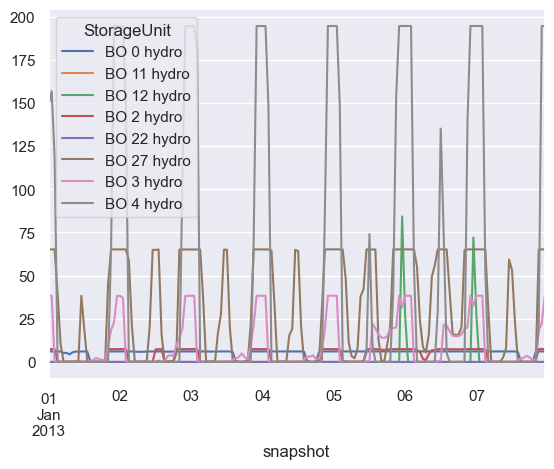

In [116]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].plot()

In [117]:
hydro_serie = n.storage_units.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
hydro_serie

bus    carrier
BO 0   hydro        6.13
BO 11  hydro      118.68
BO 12  hydro       91.11
BO 2   hydro        7.46
BO 22  hydro       27.66
BO 27  hydro       65.25
BO 3   hydro       38.40
BO 4   hydro      194.63
Name: p_nom_opt, dtype: float64

In [118]:
hydro_serie.sum()

549.3199999999999

In [119]:
n.storage_units_t.p.sum().sum()

1117274.2535125893

# Plot Load + Generators + Storage_Units

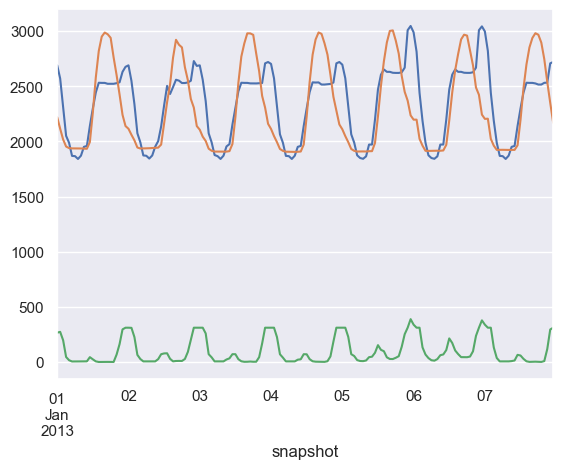

In [120]:
total_load = n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()

gen_units = n.generators_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

res_units = n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

In [121]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                6.389532e-01         4.501090e+07   
            Combined-Cycle Gas     8.682692e-01         1.044038e+07   
            Geothermal             9.986683e-01         4.883239e+08   
            Oil                             NaN         0.000000e+00   
            Onshore Wind           1.265702e-01         5.030132e+06   
            Open-Cycle Gas                  NaN         0.000000e+00   
            Run of River           4.343796e-01         1.657534e+08   
            Solar                  1.918094e-01         7.835977e+07   
            load                   1.151276e-08         0.000000e+00   
Line        AC                     4.383910e-01         8.008084e+07   
Link        H2 electrolysis        3.380487e-01         8.824313e+06   
            H2 fuel cell           1.202476e-01         9.947799e+06   
            battery charger        2.834491e-01         1.280169e+07   
            battery discharger     2.295938e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        2.321829e-01         8.823570e+07   
Store       Battery Storage        4.903163e-01         2.606349e+07   
            Hydrogen Storage       4.578524e-01         5.035216e+06   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                0.000000        9.900000e+01   
            Combined-Cycle Gas     0.000000        1.236000e+02   
            Geothermal             0.000000        5.500000e+01   
            Oil                    0.000000        0.000000e+00   
            Onshore Wind           0.072560        4.500000e+01   
            Open-Cycle Gas         0.000000        0.000000e+00   
            Run of River           2.188770        6.117700e+02   
            Solar                 16.261651        1.004000e+02   
            load                   0.000000        3.000000e+10   
Line        AC                          NaN        2.703558e+04   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        5.493200e+02   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        1.548341e+03      1.619008e+02   
            Combined-Cycle Gas             1.383334e+03      1.236000e+02   
            Geothermal                     1.554684e+01      1.460163e+03   
            Oil                            0.000000e+00      0.000000e+00   
            Onshore Wind                   1.433815e-01      4.602320e+01   
            Open-Cycle Gas                 0.000000e+00      0.000000e+00   
            Run of River                   2.664083e+00      6.117700e+02   
            Solar                          5.998777e+00      1.540818e+03   
            load                           3.487279e+02      3.000000e+10   
Line        AC                                      NaN      2.023519e+04   
Link        H2 electrolysis                0.000000e+00      1.808468e+02   
            H2 fuel cell                   0.000000e+00      4.067276e+02   
            battery charger                0.000000e+00      3.324448e+02   
            battery discharger             0.000000e+00      3.693831e+02   
Load        -     

In [122]:
load_shedding = n.generators_t.p.loc["2013-01-01":"2014-01-01"].groupby(n.generators.carrier, axis=1).sum()["load"]
load_shedding.sum()

3025553.182143858

<AxesSubplot:xlabel='snapshot'>

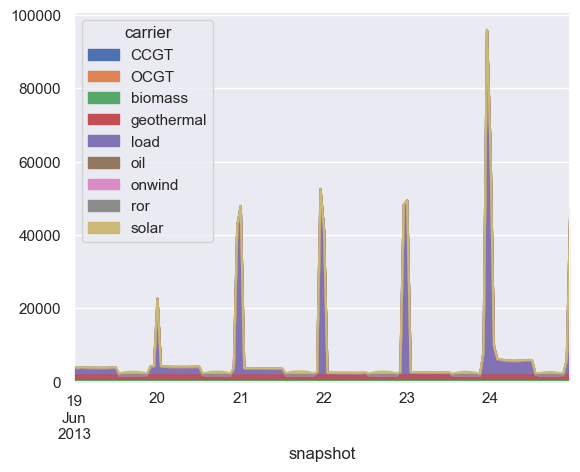

In [123]:

n.generators_t.p.loc["2013-06-19":"2013-06-24"].groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

In [124]:
print("\n")
print("Average cost: "+str(n.objective/n.loads_t.p.sum().sum())+"[€/MWh]")
        

loads=n.generators[n.generators.carrier=="load"]

print("Load carrier (load shedding) : "+str(n.generators_t.p[loads.index].sum().sum()/1e6)+" TWh")

battery=n.stores_t.p.groupby(n.stores.carrier, axis=1).sum()["battery"]

i=0
nbattery = []
pbattery =[]
for i in battery:
    if i < 0:
        nbattery.append(i)
    else:
        nbattery.append(0) 
for i in battery:
    if i > 0:
        pbattery.append(i)
    else:
        pbattery.append(0)

        
        
H2=n.stores_t.p.groupby(n.stores.carrier, axis=1).sum()["H2"]

i=0
nH2 = []
pH2 =[]
for i in H2:
    if i < 0:
        nH2.append(i)
    else:
        nH2.append(0) 
for i in H2:
    if i > 0:
        pH2.append(i)
    else:
        pH2.append(0)
        
n.generators = n.generators[n.generators.carrier != "load"]
n.generators_t.p = n.generators_t.p[n.generators.index]
p_cap_gen=(n.generators.p_nom_opt.sum().sum()+n.storage_units.p_nom_opt.sum().sum())
p_cap_bat=(n.stores.e_nom_opt.sum().sum()/6)
data_p0 = n.links_t.p0
data_p1 = n.links_t.p1


print("Total installed power :"+str(p_cap_gen/1e3)+" GW")
print("Total production : "+str((n.generators_t.p.sum().sum()+n.storage_units_t.p.sum().sum())/1e6) +"TWh")


print("Total energy stored: "+str(np.sum(pbattery)/1e6+np.sum(pH2)/1e6) +"TWh")

print("Total installed power battery: "+str(p_cap_bat/1e3) +" GW")

print("Losts in the batteries:"+ str((data_p0.sum().sum()+data_p1.sum().sum())/1e6)+"TWh")
print("\n")

renewable_carriers = ["onwind", "solar", "ror", "biomass", "geothermal"]
renewable = n.generators[n.generators.carrier.isin(renewable_carriers)]
print("Total production per renewable: "+str(n.storage_units_t.p.sum().sum()/1e6+n.generators_t.p[renewable.index].sum().sum()/1e6) +"TWh")
print("\n")

#print("Production-lost : "+str((n.generators_t.p.sum().sum()+n.storage_units_t.p.sum().sum())/1e6-n.generators_t.p[loads.index].sum().sum()/1e6-(data_p0.sum().sum()+data_p1.sum().sum())/1e6) +"TWh")


print("Percentage of battery installed:"+str(p_cap_bat/p_cap_gen*100)+"%")
print("Total demand : "+str(n.loads_t.p.sum().sum()/1e6) +"TWh")



Average cost: 31.619432762002322[€/MWh]
Load carrier (load shedding) : 3.025553182143858 TWh
Total installed power :4.493595223360055 GW
Total production : 20.70544821295724TWh
Total energy stored: 0.8495123365728814TWh
Total installed power battery: 1.3274820071019173 GW
Losts in the batteries:0.4438893468067043TWh


Total production per renewable: 19.765341913128267TWh


Percentage of battery installed:29.541646301406338%
Total demand : 20.264584409948696TWh


<AxesSubplot:xlabel='snapshot'>

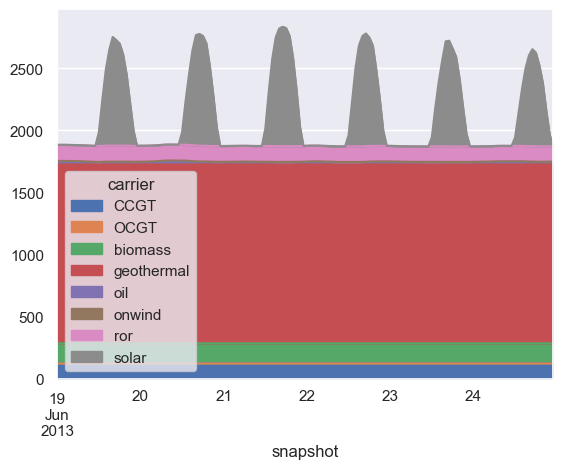

In [125]:

n.generators_t.p.loc["2013-06-19":"2013-06-24"].groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")